### Project Allocation

Enter your matric number and run this cell (shift+enter) to check project allocated

In [17]:
matric_number = "A0167299J" #@param {type:"string"}

try:
    idx = int(list(filter(str.isdigit, matric_number))[-1])%2

    if idx == 0:
        print('Matric Number:', matric_number)
        print('Project      : 1A-Classification')
        print('https://colab.research.google.com/drive/1v-LiHThlLFF7bm8n64nh8lieAM2jA7lz?usp=sharing')
    elif idx == 1:
        print('Matric Number: ', matric_number)
        print('Project      : 1B-Regression')
        print('https://colab.research.google.com/drive/1Psi1UXp53t3_fMj8t0uIu4rubbV2wRCl?usp=sharing')

except IndexError:
    print("Please enter valid matric number and try again")

Matric Number:  A0167299J
Project      : 1B-Regression
https://colab.research.google.com/drive/1Psi1UXp53t3_fMj8t0uIu4rubbV2wRCl?usp=sharing


### Introduction

**EE4305 (2020): Exercise 1B: Regression using Boston housing dataset**

---
In this exercise you will learn basics of implementing an ANN-based regression model using TensorFlow and Keras libraries in Python. Following are the learning outcomes of this exercise:

*   Ability to implement a neural network based regression model in Keras
*   Train and predict using the model
*   Evaluate model performance
*   Understand the effect of various model parameters
*   Propose means to improve model performance
*   Perform data analytics and visualize outcomes 

Below the code skeleton is provided to help you with setting up the required options. Look for code cells describing the problems that each student needs to solve.

More details about the dataset can be found [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)


### Instructions for using the Notebook

If you have prior experience using Jupyter Notebooks, Colab is very similar. Please refer to the **Help** menu for FAQs. **Tools** menu provides useful information on commands and keyboard shortcuts. You may use the **Table of contents** menu on the left hand side to easily navigate between sections.

---
**VERY IMPORTANT: DO NOT MODIFY this file. Make a copy from the File menu and modify your version. You may use your matric number to name the file. For example, "A0140410A: Exercise 1A - Classification"**

---

The code skeleton provided is just a template. Feel free to modify/ improve any of the cells and scripts if you would prefer to implement them differently. If you have a local notebook environment with required packages, you may also download the notebook from **File** menu and run the script locally. Feel free to input additional **code** cells or **text** cells to present your solutions.

### Submission

For submission, download the notebook in '*.ipynb' format and submit in LumiNUS. Make sure all outputs are present under each cells (Especially for solution cells). Ensure you name the file appropriately as mentioned above.

### Import libraries

Following libraries are required for the implementation. Additional libraries may be imported as needed for specific tasks.

*   numpy, pandas: For data storage and manipulation
*   matplotlib, seaborn: Plotting and visualization
*   tensorflow: Low-level library for machine learning implementations
*   keras: High-level library to import datasets and implement ANN model
*   sklearn: Data preprocessing, model evaluation metrics



In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from tensorflow.keras.datasets import boston_housing

import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2, L1L2

from tensorflow.keras import callbacks

from tensorflow.keras.utils import to_categorical

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as skmse

### Load Data

Keras provides an easy to use API to load popular machine learning datasets. For this problem we use the MNIST digits dataset.



Data Shapes
Training data - xtr:(404, 13), ytr:(404,)
Testing data - xte:(102, 13), yte:(102,)



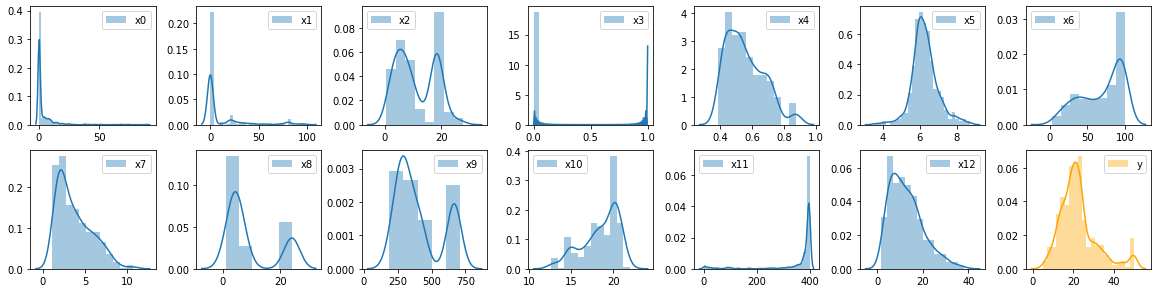

In [22]:
(xtr, ytr), (xte, yte) = boston_housing.load_data()

print('Data Shapes')
print('Training data - xtr:{}, ytr:{}'.format(xtr.shape, ytr.shape))
print('Testing data - xte:{}, yte:{}\n'.format(xte.shape, yte.shape))

# Visualize distribution of input features and output data

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 4))

for i, ax in enumerate(axs.flatten()):
    if i < xtr.shape[1]:
        sns.distplot(xtr[:,i], ax=ax)
        ax.legend(['x{}'.format(i)])
    if i == xtr.shape[1]:
        sns.distplot(ytr, ax=ax, color='orange')
        ax.legend(['y'])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

### Data Preparation

Input data consists of 13 features that describe the aspects of a house and the region. Output labels indicate the median pricing. For neural networks based regression data needs to be normalized

---
### Problem I

1.   What is the correct range of the input and output values for normalization? Why? Implement normalization code in the cell below. 

```
Hint: refer to sklearn.preprocessing - StandardScaler, MinMaxScaler.
Hint: Choice of normalization range may be impacted by the choice of activation functions in the model.
```
---

In [0]:
# Code for input data normalization and output one-hot encoding
# You may directly use available helper functions from sklearn and keras or implement your own function
#scaler = StandardScaler() 

xscaler = MinMaxScaler(feature_range=(-1,1))
xtr_norm = xscaler.fit_transform(xtr)
xte_norm = xscaler.transform(xte)

yscaler = MinMaxScaler()
ytr_norm = yscaler.fit_transform(ytr.reshape(-1,1))
yte_norm = yscaler.transform(yte.reshape(-1,1))

In [24]:
print("Original x range (min,max): ", np.min(xtr), np.max(xtr))
print("Normalized x range (min,max): ", np.min(xtr_norm), np.max(xtr_norm))

Original x range (min,max):  0.0 711.0
Normalized x range (min,max):  -1.0000000000000002 1.0000000000000002


### Define Model

Below we define a baseline ANN-based model. Dense layers are fully connected layers in Keras used to define a standard MLP. Notice that the output layer contains 1 neuron for output prediction. Output uses 'linear' activation as this is a regression problem.


Number of layers, neurons and activations for hidden layers can be customized

The function returns a Keras model that can be used to train, predict, and evaluate using in-built functions.

In [0]:
def get_model(input_shape):
  input_data = Input(shape=input_shape)

  d1 = Dense(16, activation='tanh')(input_data)
  d2 = Dense(8, activation='tanh')(d1)
  #dr2 = Dropout(0.5)(d2)
  d3 = Dense(1, activation='linear')(d2)

  model = Model(inputs=[input_data], outputs=[d3])

  return model

---
### Problem II

1.   Compile and train the model using in-built functions in Keras

```
# Use compile to set following parameters:
#  - optimizer = adam, sgd, rmsprop
#  - loss = mean_squared_error

compile(
    optimizer='rmsprop', loss=None, metrics=None, loss_weights=None,
    sample_weight_mode=None, weighted_metrics=None, **kwargs
    )

# Use fit to train the model. Configure following parameters:
#  - x,y: input data and label
#  - batch_size: minibatch size, for example, 1, 16, 32, 100
#  - epochs: between 10-100
#  - validation_split: percentage of training data for validation (eg. 0.1)

fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)
```
[Compile API](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

[Fit API](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)


2.   Predict output for test data using trained model and evaluate model performance



```
# Use predict function. Most parameters can be left as default. Pass normalized input features for output prediction

predict(
    x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, 
    workers=1, use_multiprocessing=False
)

```

[Predict API](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

Note that the output from the model is normalized. Transform the prediction to original scale before evaluating model performance.

For example:

```
# sklearn.preprocessing API provides function to reverse the normalization. HINT: inverse_transform()
```
---

In [0]:
# Code for model training here

model = get_model(xtr_norm.shape[1:])
#model.summary()

In [27]:
model.compile(optimizer='adam', loss='mse')
model.fit(xtr_norm, ytr_norm, batch_size=8, epochs= 50, validation_split=0.1)


Epoch 1/50
46/46 [==============================] - 0s 3ms/step - loss: 0.1314 - val_loss: 0.0502
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0639 - val_loss: 0.0373
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0454 - val_loss: 0.0305
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0340 - val_loss: 0.0254
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0214
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.0179
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0167
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.0145
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 10/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0131
Epoch 11/50
46/46 [

In [28]:
# Code for prediction here

yte_pred_norm = model.predict(xte_norm)
yte_pred = yscaler.inverse_transform(yte_pred_norm)

rmse = np.sqrt(skmse(yte, yte_pred))
print("Baseline model RMSE: ", rmse)

Baseline model RMSE:  4.2486867339641075


In [0]:
#print("before yte inverse: ", yte_pred_norm)
#print("after yte inverse: ", yte_pred)

---
### Problem III

The baseline model is expected to have a test rmse of around 4.00. Can you propose at least 5 methods to improve the model to achieve better performance?

Implement the 5 variants and present your results in the cell below. Explain why each variant performs better/ worse than the baseline.

```
Hint: Following are some of the model configurations that can be modified:
```

1.   Batch size, number of epochs, validation split, optimizer, learning rate
2.   Model depth, dropout layers, activations, regularizations
3.   Advanced: Model callbacks to control early stopping, learning rate decay, model checkpoints

---

### Solution here

| Model         | Parameters Tuned                            | Accuracy  |
| ------------- |---------------------------------------------| ---------:|
| Baseline      | Default                                     | 4.25      |
| Alpha         | Batch size                                  | 3.85      |
| Beta          | Epochs                                  | 3.57     |
| Delta         | Dropouts                                        | 4.01   |
| Echo          | Optimizer                              |  4.84      |
| Gamma         | Activation                             | 3.93      |

```
# Please remove the examples and update with your own model variants.
```

**batch size changed from 8 to 1**

model.fit(xtr_norm, ytr_norm, batch_size=1, epochs= 50, validation_split=0.1)

RMSE score of 3.85

Batch size controls the accuracy of the estimate of the error gradient when training the model. A smaller batch size offers a regularizing effect and lower generalization error.

**number of epochs changed from 50 to 100**

model.fit(xtr_norm, ytr_norm, batch_size=8, epochs= 100, validation_split=0.1)

RMSE score of 3.57

The model improved with more epochs since it was tuned more frequently with every epoch. However there is a limit to the number of epochs as it will introduce overfitting with high number of epochs.

**Dropout layer inserted in the model**

dr2 = Dropout(0.5)(d2)

RMSE score of 4.01

Dropout improves accuracy of model by preventing the model from overfitting. However more samples are needed for the dropout layer to have an impact on the accuracy

**Optimizer changed from 'adam' to 'RMSprop'**

model.compile(optimizer='RMSprop', loss='mse')

RMSE score of 4.84

RMSprop has a learning rate of 0.001 compared to adam which has a learning rate of 0.01 so the adam optimizer makes the model learn at a faster rate which makes it more accurate at fewer epochs

**Activation changed from 'tanh' to 'relu'**

d1 = Dense(16, activation='relu')(input_data)
d2 = Dense(8, activation='relu')(d1)

RMSE score of 3.93

'relu' allows the model to learn at a faster rate since all negative inputs in the hidden layers will be classified as 0

---
### Problem IV

RMSE is the standard metric for evaluating model performance in regression problems. 

*   Can you propose other measures to evaluate model performance? 
*   Compute the scores for your models using the proposed metric.
*   What are the benefits of using the proposed metric?

```
HINT: Several popular metrics can be found in the sklearn.metrics library
```
---

Use R² or Coefficient of Determination

In [30]:
### Problem IV codes here. Add more cells as needed
from sklearn.metrics import r2_score

r2 = r2_score(yte,yte_pred)
print("Baseline model R2: ", r2)


Baseline model R2:  0.7831510762135299


The benefit of using R2 metrics is that it helps us to compare our current model with a constant baseline and tells us how much our model is better. R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model with a max value of 1.

---
### Bonus

Data visualization at various stage helps develop intuition of model performance, cause for errors, and ideas for improvement.

*   Can you write scripts to visualize different aspects of the model?

```
HINT: You can visualize model loss over epochs using the keras model history returned by model.fit(). 
      Regression, scatter, correlation, and distribution plots are useful to analyze regression data and model performance.
```
---

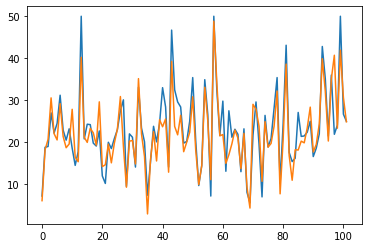

In [31]:
### Bonus codes here. Add more cells as needed

plt.plot(yte)
plt.plot(yte_pred)



### Have a Feedback?

If you have suggestions to improve this notebook, please share your ideas via email to the GA. We are always listening!

Thank you.

---

End of the Notebook

---